# **Decision Tree Classification**
## ECE 204 Data Science & Engineering

In this Case Study,  we'll look at how a Decision Tree classifier deals with different shapes of data and the kind of decision regions it makes in 2-D.

In [1]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier

## Linearly separable data

Lets look at the blobs data. It is approximately linearly separable, meaning the two classes can be seperated with just a line!

In [2]:
angle_train = pd.read_csv("angle_train.csv")
grid_data = pd.read_csv("test_data.csv")

print(angle_train.shape, grid_data.shape)
angle_train.head(), grid_data.head()

(2000, 3) (14400, 2)


(      feat1     feat2  label
 0  0.889630  0.925805    0.0
 1 -0.493743 -0.559436    1.0
 2  0.617961  0.837638    0.0
 3  0.051401  1.143364    0.0
 4 -1.236636 -1.041021    1.0,
    feat1  feat2
 0  -3.00   -3.0
 1  -2.95   -3.0
 2  -2.90   -3.0
 3  -2.85   -3.0
 4  -2.80   -3.0)

<Axes: xlabel='feat1', ylabel='feat2'>

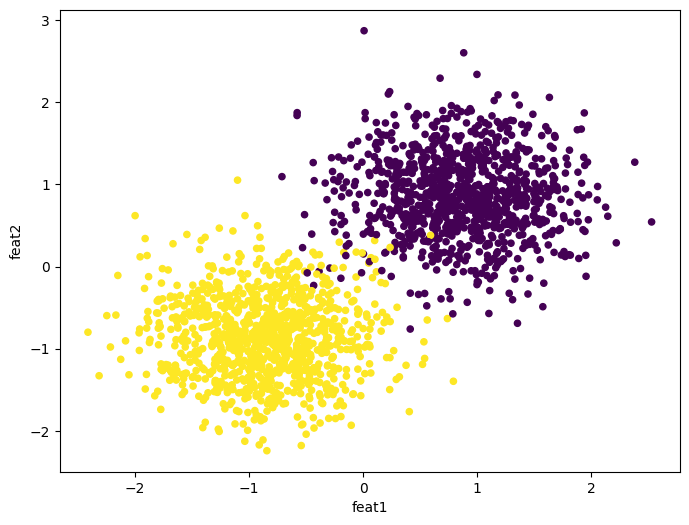

In [3]:
# plot the train data. 
angle_train.plot.scatter(x="feat1",y="feat2",c="label", cmap="viridis", colorbar=False, figsize=(8,6))

Using max_depth = 3
Feature importances = [0.12344718 0.87655282]


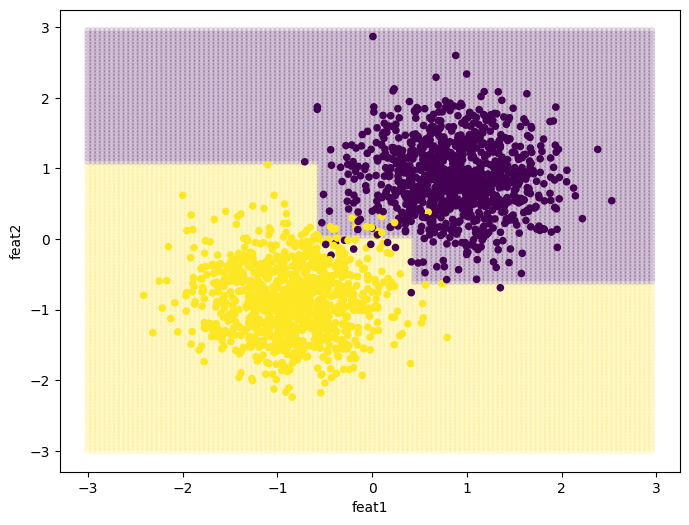

In [4]:
# train the classifier
mx_depth = 3 # try different values!

clf = DecisionTreeClassifier(random_state=1, max_depth=mx_depth)
clf.fit(angle_train[["feat1", "feat2"]], angle_train["label"])

# predict the label on test data
grid_data["pred"] = clf.predict(grid_data[["feat1", "feat2"]])

# plot both of the data in one plot
# We are making the test point 10% transparent using alpha = 0.1
# Dark points are training points
ax1 = grid_data.plot.scatter(x="feat1",y="feat2",c="pred", cmap="viridis", colorbar=False, figsize=(8,6), alpha=0.1)
angle_train.plot.scatter(x="feat1",y="feat2",c="label", cmap="viridis", colorbar=False, figsize=(8,6), ax=ax1)

print("Using max_depth =",mx_depth)
print("Feature importances =",clf.feature_importances_)

### What did we obtain in the graph above?
 - `test_data` contains all the points of the grid 
 - We predict labels for each point and visualize them in the plot above
 - This way we can visualize the **decision region** obtained by the Decision Tree

What are some of the decision rules leaned by this model?

### Decision boundary comparison with KNN

knn using k = 30


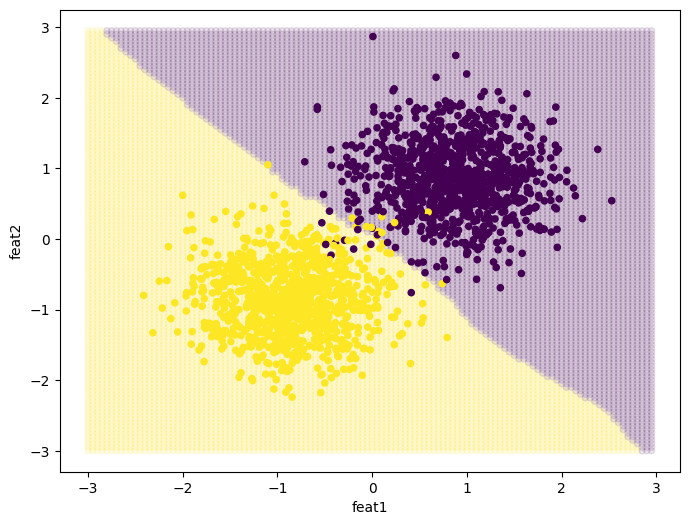

In [5]:
from sklearn.neighbors import KNeighborsClassifier
k = 30

knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(angle_train[["feat1", "feat2"]], angle_train["label"])
grid_data["pred"] = knn.predict(grid_data[["feat1", "feat2"]])

ax1 = grid_data.plot.scatter(x="feat1",y="feat2",c="pred", cmap="viridis", colorbar=False, figsize=(8,6), alpha=0.1);
angle_train.plot.scatter(x="feat1",y="feat2",c="label", cmap="viridis", colorbar=False, figsize=(8,6), ax=ax1);

print("knn using k =",k)

## Linearly non-separable data
Now lets look at how a Decision Tree classifier performs when the data is not linearly separable

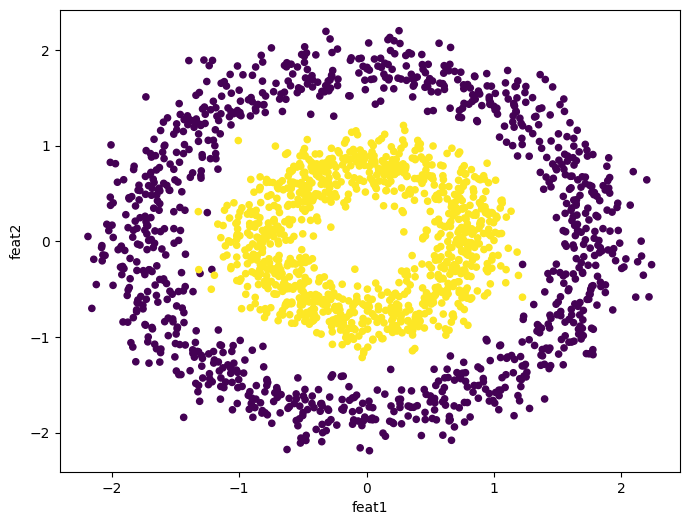

In [6]:
circles_train = pd.read_csv("circles_train.csv")
test_data = pd.read_csv("test_data.csv")

circles_train.plot.scatter(x="feat1",y="feat2",c="label", cmap="viridis", colorbar=False, figsize=(8,6));

Using max_depth = 4


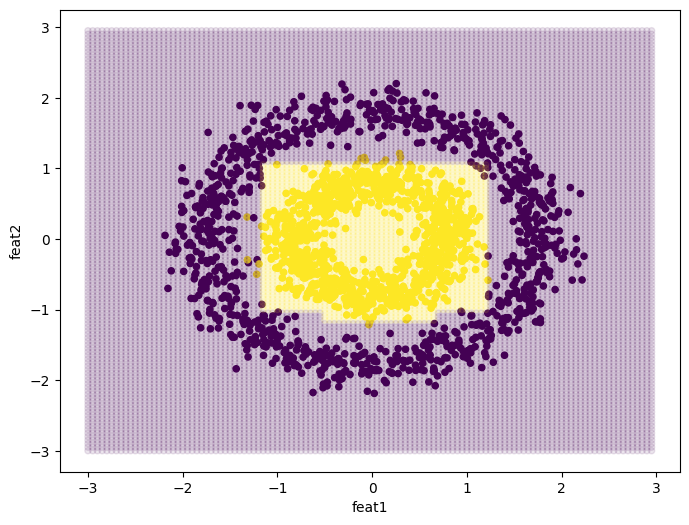

In [7]:
mx_depth = 4

clf = DecisionTreeClassifier(random_state=1, max_depth=mx_depth)
clf.fit(circles_train[["feat1", "feat2"]], circles_train["label"])

test_data["pred"] = clf.predict(test_data[["feat1", "feat2"]])

ax1 = circles_train.plot.scatter(x="feat1",y="feat2",c="label", cmap="viridis", colorbar=False, figsize=(8,6));
test_data.plot.scatter(x="feat1",y="feat2",c="pred", cmap="viridis", colorbar=False, ax=ax1, alpha=0.1)
print("Using max_depth =",mx_depth)
#print("Feature importances =",clf.feature_importances_)

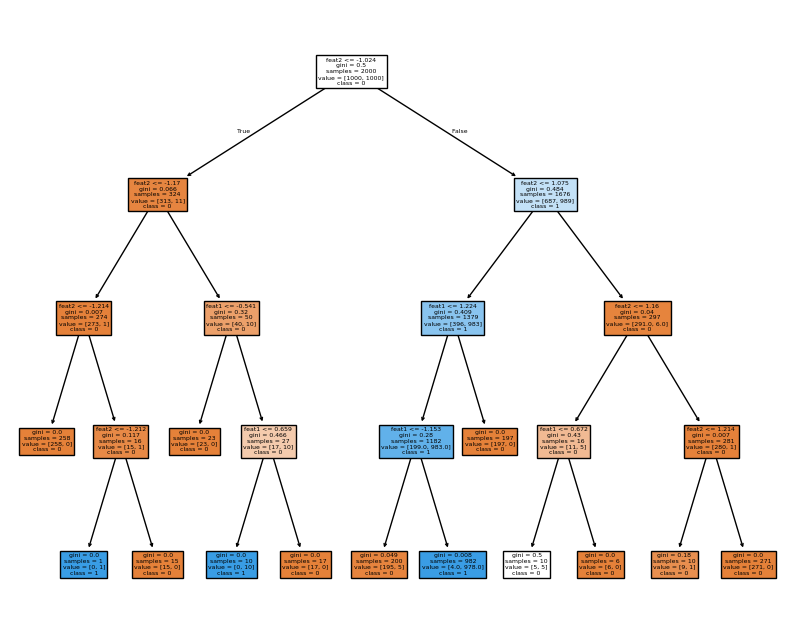

In [8]:
from matplotlib import pyplot as plt
from sklearn import tree

fig = plt.figure(figsize=(10,8))
fig = tree.plot_tree(clf, feature_names=["feat1", "feat2"], class_names= ['0','1'], filled=True)

Great!! even with non linear data, the decision tree finds good decision rules!

Notice how we'd need `max_depth` at least 4 to classify circular data like the one above.

<br>

## Understanding Feature Importance

Now let's understand feature importance visually.

Which of the two features do you think is more important in the plot below?

<Axes: xlabel='feat1', ylabel='feat2'>

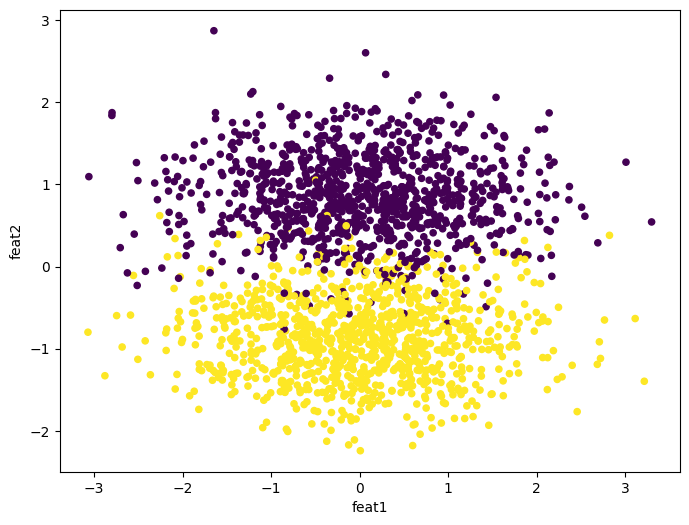

In [9]:
vertical_train = pd.read_csv("vertical_train.csv")
test_data = pd.read_csv("test_data.csv")

vertical_train.plot.scatter(x="feat1",y="feat2",c="label", cmap="viridis", colorbar=False, figsize=(8,6))

`feat2` seems to be much more important to classify the above data as if we use the rule `if feat2 > 0, class_blue otherwise class_yellow` We'd do a pretty good job of classifying the above data!

Notice we can not find any such decision line with respect to `feat1` hence it is not very important for the above classification

Lets visualize the decison tree classifier's predictions to see what rule it learns

Using max_depth = 1


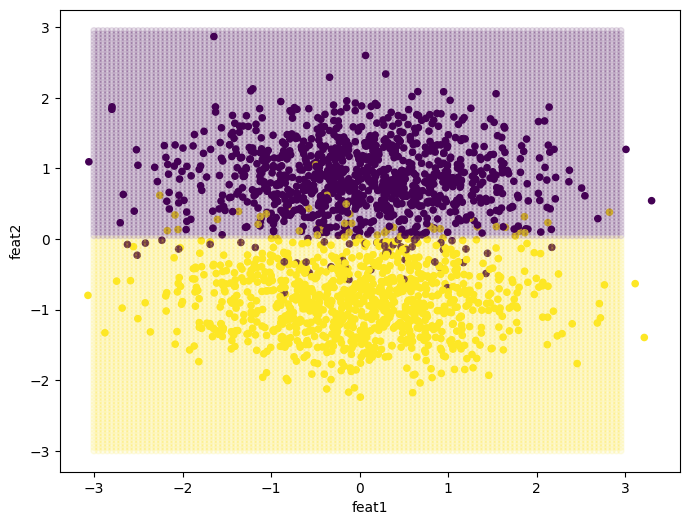

In [10]:
mx_depth = 1
clf = DecisionTreeClassifier(random_state=1, max_depth=mx_depth)
clf.fit(vertical_train[["feat1", "feat2"]], vertical_train["label"])

test_data["pred"] = clf.predict(test_data[["feat1", "feat2"]])

ax1 = vertical_train.plot.scatter(x="feat1",y="feat2",c="label", cmap="viridis", colorbar=False, figsize=(8,6))
test_data.plot.scatter(x="feat1",y="feat2",c="pred", cmap="viridis", colorbar=False, figsize=(8,6), ax=ax1, alpha=0.1)
print("Using max_depth =",mx_depth)

It does learn the decision region we hypothesized above!

Now lets see what does the decision tree classifier thinks about feature importances

In [11]:
print("Feature importances =",clf.feature_importances_)

Feature importances = [0. 1.]


Low importance is assigned to `feat1` and a much higher importance is assigned to `feat2`